In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib as plt

In [5]:
data = pd.read_csv('lamb_weston_clean.csv')

In [6]:
data.head(5)

,Unnamed: 0,Asset,Logical_Date,Shift,Start_Time,End_Time,Seconds,Minutes,Hours,Start_Cycles,...,Reason_Lvl1,Reason_Lvl2,Reason_Lvl3,Reason_Lvl4,Notes,PartReplaced,SKU,User,Line_Status,Dataset
0,0,L1 String 6,2017-12-01,1,2017-12-01 07:00:00,2017-12-01 07:00:05,5,0.083333,0.001389,3,...,Uptime,A,A,A,A,No,Kraft 6 lb.,None,Line Flow,9001
1,1,L1 String 6,2017-12-01,1,2017-12-01 07:00:05,2017-12-01 07:08:28,503,8.383333,0.139722,276,...,Uptime,A,A,A,A,No,Kraft 6 lb.,None,Line Flow,9001
2,2,L1 String 6,2017-12-01,1,2017-12-01 07:08:28,2017-12-01 07:08:46,18,0.300000,0.005000,A,...,Bagger,Festooner Late Fault,A,A,A,No,Kraft 6 lb.,None,Line Flow,9001
3,3,L1 String 6,2017-12-01,1,2017-12-01 07:08:46,2017-12-01 07:18:57,611,10.183333,0.169722,342,...,Uptime,A,A,A,A,No,Kraft 6 lb.,None,Line Flow,9001
4,4,L1 String 6,2017-12-01,1,2017-12-01 07:18:57,2017-12-01 07:19:10,13,0.216667,0.003611,A,...,No Product,Starved,A,A,A,No,Kraft 6 lb.,None,Line Flow,9001


In [7]:
df = data[['Logical_Date', 'Seconds']]

In [8]:
df.shape

(48853, 2)

In [15]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [12]:
df = df.rename(index=str, columns={"Logical_Date": "ds", "Seconds": "y"})

In [32]:
# df.replace(to_replace=0, value=5000, inplace=True)

In [16]:
df['y'] = np.log(df['y'])
df.set_index('ds').plot()

In [17]:
# Python
m = Prophet()
m.fit(df)


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# 90 Days Forecast

In [18]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
48938,2018-03-27
48939,2018-03-28
48940,2018-03-29
48941,2018-03-30
48942,2018-03-31


In [19]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
48938,2018-03-27,0.059225,-22.764420,22.640292
48939,2018-03-28,0.268830,-22.964717,23.602309
48940,2018-03-29,0.205689,-23.611770,24.267163
48941,2018-03-30,0.435739,-23.903882,24.534455
48942,2018-03-31,0.343189,-23.931516,24.562177


In [20]:
np.exp(forecast[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
48938,1.061013,1.298787e-10,6.800703e+09
48939,1.308433,1.063041e-10,1.779724e+10
48940,1.228371,5.565939e-11,3.460150e+10
48941,1.546105,4.156004e-11,4.520417e+10
48942,1.409435,4.042730e-11,4.647483e+10


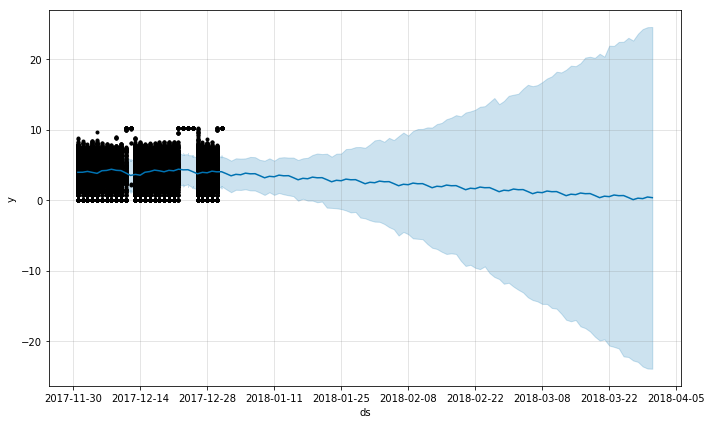

In [21]:
m.plot(forecast)

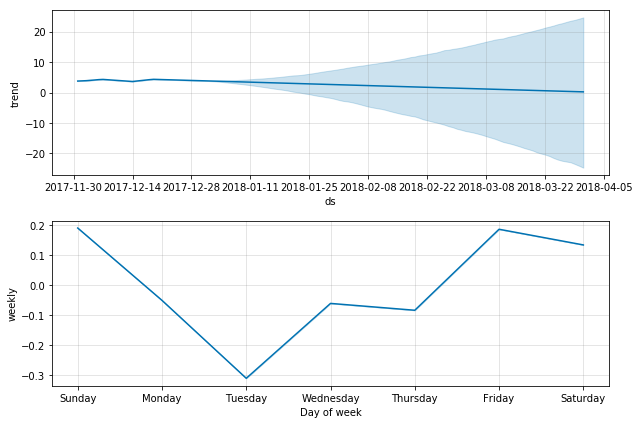

In [22]:
m.plot_components(forecast)

# 30 Days Forecast

In [23]:
future2 = m.make_future_dataframe(periods=30)
future2.tail()

,ds
48878,2018-01-26
48879,2018-01-27
48880,2018-01-28
48881,2018-01-29
48882,2018-01-30


In [24]:
# Python
forecast2 = m.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
48878,2018-01-26,2.973667,-1.154662,7.112401
48879,2018-01-27,2.881117,-1.615556,7.298809
48880,2018-01-28,2.897253,-1.648739,7.523177
48881,2018-01-29,2.615493,-2.528610,7.206634
48882,2018-01-30,2.315160,-3.096201,7.452812


In [25]:
np.exp(forecast2[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
48878,19.563527,0.315164,1227.090236
48879,17.834176,0.198780,1478.538402
48880,18.124298,0.192292,1850.437089
48881,13.673958,0.079770,1348.345471
48882,10.126547,0.045221,1724.706771


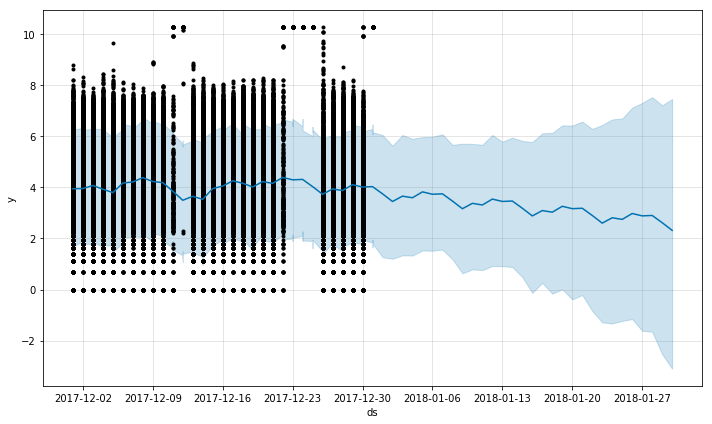

In [26]:
m.plot(forecast2)

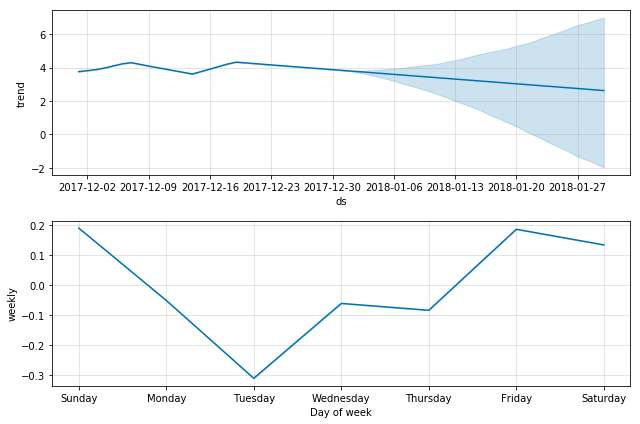

In [27]:
m.plot_components(forecast2)

In [33]:
# trend with changepoint
c = Prophet(changepoint_prior_scale=0.5)
c.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
future3 = c.make_future_dataframe(periods=30)
future3.tail()

,ds
48878,2018-01-26
48879,2018-01-27
48880,2018-01-28
48881,2018-01-29
48882,2018-01-30


In [35]:
# Python
forecast3 = c.predict(future3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
48878,2018-01-26,2.993598,-19.837524,25.266087
48879,2018-01-27,3.023745,-20.656334,26.987477
48880,2018-01-28,3.230939,-22.490384,27.564905
48881,2018-01-29,2.817678,-24.225868,29.113533
48882,2018-01-30,2.255233,-26.479934,30.031899


In [37]:
np.exp(forecast3[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
48878,19.957361,2.424782e-09,9.395546e+10
48879,20.568177,1.069222e-09,5.254267e+11
48880,25.303403,1.708246e-10,9.360218e+11
48881,16.737948,3.011889e-11,4.403995e+12
48882,9.537517,3.161627e-12,1.103286e+13


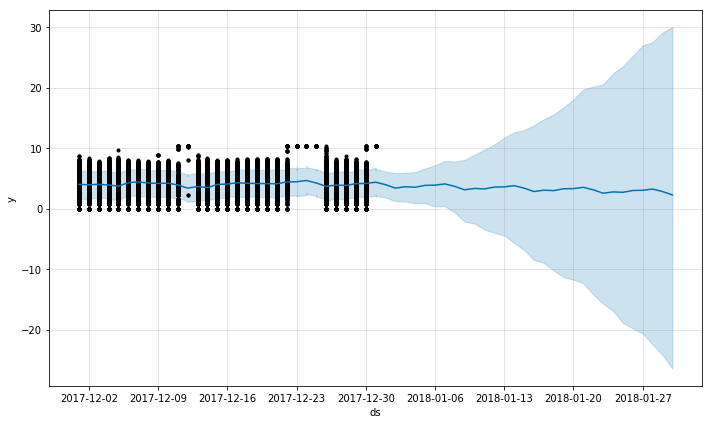

In [38]:
c.plot(forecast3)

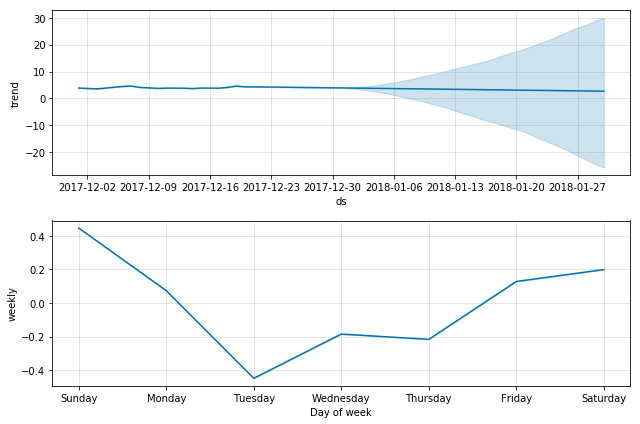

In [39]:
c.plot_components(forecast3)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


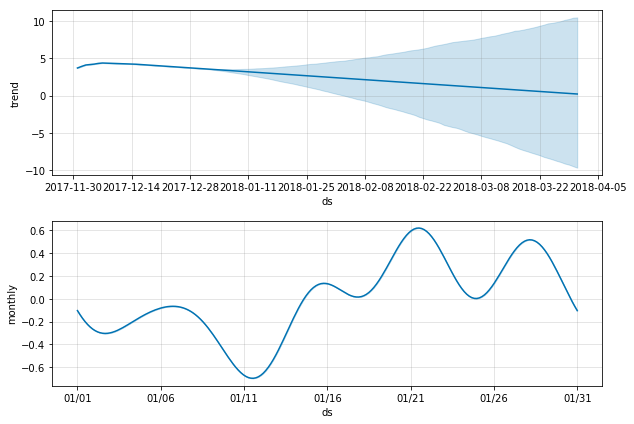

In [41]:
w = Prophet(weekly_seasonality=False)
w.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast4 = w.fit(df).predict(future)
w.plot_components(forecast4)